# Exercise 3.1

Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable *numkdhh* to construct the actual distribution for the number of children under 18 in the household.


Read the female respondent file.

In [27]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

In [28]:
resp.numkdhh.value_counts()

0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [29]:
import thinkstats2
kids_under18 = thinkstats2.Pmf(resp.numkdhh)
# a few sanity checks to see we got what we wanted
kids_under18.Prob(0)

0.46617820227659301

In [30]:
kids_under18.Prob(5)

0.010728771424833181

In [31]:
type(kids_under18)

thinkstats2.Pmf

In [32]:
kids_under18.Total()

1.0

Display the PMF.

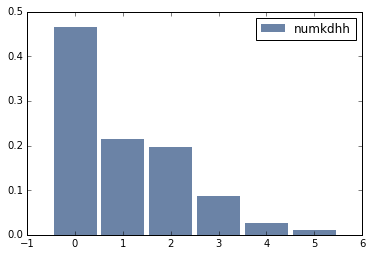

In [34]:
import thinkplot

thinkplot.Hist(kids_under18, label='numkdhh')
thinkplot.Show()

Define <tt>BiasPmf</tt>.

In [35]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

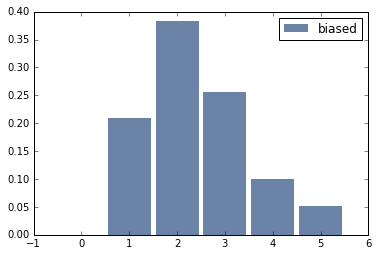

In [43]:
biased_pmf = BiasPmf(kids_under18, label='biased')
# lets take a look at the plot
thinkplot.Hist(biased_pmf, label='biased')
thinkplot.Show()

Display the actual Pmf and the biased Pmf on the same axes.

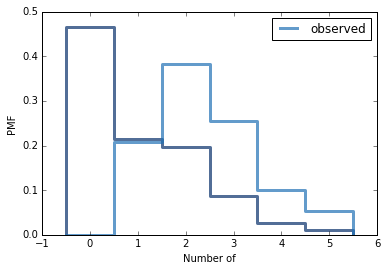

In [42]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([kids_under18, biased_pmf])
thinkplot.Show(xlabel='Number of', ylabel='PMF')

Compute the means of the two Pmfs.

In [44]:
kids_under18.Mean()

1.0242051550438309

In [45]:
biased_pmf.Mean()

2.4036791006642821